# 데이터 전처리

In [49]:
import numpy as np
from matplotlib import pyplot as plt

In [61]:
# 중복
import pandas as pd

# 예시 데이터프레임
df = pd.read_csv('winequality-red.csv')


# 모든 변수가 중복된 행 찾기
all_variables_duplicate_rows = df[df.duplicated(subset=df.columns, keep=False)]

# 중복된 행 출력
print("모든 변수가 중복된 행:")
print(all_variables_duplicate_rows)

# 중복된 행 확인
duplicates = df[df.duplicated()]

# 중복된 행의 인덱스 출력
duplicate_indices = duplicates.index
print("중복된 행의 인덱스:", duplicate_indices)

모든 변수가 중복된 행:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
4               7.4             0.700         0.00            1.90      0.076   
9               7.5             0.500         0.36            6.10      0.071   
11              7.5             0.500         0.36            6.10      0.071   
22              7.9             0.430         0.21            1.60      0.106   
27              7.9             0.430         0.21            1.60      0.106   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
64              7.2             0.725         0.05            4.65      0.086   
65              7.2             0.725         0.05            4.65      0.086   
75              8.8             0.410         0.64            2.20      0.093   
76            

In [62]:
import pandas as pd

# 중복된 데이터 제거 (하나는 남기고 나머지 제거)
df = df.drop_duplicates(keep='first')

# 중복 제거된 데이터프레임 출력
print("중복 제거된 데이터프레임:")
print(df)


중복 제거된 데이터프레임:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
12              5.6             0.615         0.00            1.60      0.089   
13           

In [63]:
# 이상치
import pandas as pd

# 예시 데이터프레임 (11개의 수치형 독립변수)
# df = ...

# 이상치를 판단하는 함수
def count_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers.sum()

# 각 변수에 대해 이상치 개수 계산
outliers_count_per_variable = df.apply(count_outliers_iqr)

# 이상치 개수 출력
print("각 독립변수 별 이상치 개수:")
print(outliers_count_per_variable)


각 독립변수 별 이상치 개수:
fixed acidity            41
volatile acidity         19
citric acid               1
residual sugar          126
chlorides                87
free sulfur dioxide      26
total sulfur dioxide     45
density                  35
pH                       28
sulphates                55
alcohol                  12
quality                  27
dtype: int64


In [64]:
import pandas as pd

# 예시 데이터프레임 (11개의 수치형 독립변수)
# df = ...

# 이상치를 나타내는 함수
def detect_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# 각 변수에 대해 이상치를 나타내는 불리언 시리즈 생성
outliers_per_variable = df.apply(detect_outliers_iqr)

# 각 행에 대해 어떤 변수에서 이상치가 있는지를 나타내는 불리언 시리즈 생성
outliers_per_row = outliers_per_variable.any(axis=1)

# 이상치가 있는 행 출력
outlier_rows = df[outliers_per_row]
print("이상치가 있는 행:")
print(outlier_rows)

이상치가 있는 행:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9               7.5             0.500         0.36            6.10      0.071   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
33              6.9             0.605         0.12           10.70      0.073   
35              7.8             0.645         0.00            5.50      0.086   
38              5.7             1.130         0.09            1.50      0.172   
39              7.3             0.450         0.36            5.90      0.074   
42              7

# 제거 vs 대체 vs 가중치 부여

In [ ]:
(1) 대체하는 방법 - 다희

-1. 평균 또는 중앙값
-2. 최빈값 대체
-3. K- 최근접 이웃 대체
-4. 다중 대체 방법(MICE)


(2) 낮은 가중치를 부여하는 방법 - 연호

-1. 거리 역수 가중치
-2. 가우시안 가중치
-3. 유사도 기반 가중치
-4. 트라이 삼각 함수 가중치


(3) 이상치지만, 큰 영향을 주지 않는 경우 (판별) - 나현언니

-1. Leverage 값 사용
-2. 예측 확률 분표 분석
-3. SHAP(SHapley Additive exPlanations) 값 분석
-4. 특성 중요도 분석


(4) 샘플 자체 삭제하는 방법 - 다함께

# 이상치지만, 큰 영향을 주지 않는 경우

- 1. Leverage 값 이용
- 2. 예측 확률 분포 분석
- 3. SHAP(SHapley Additive exPlanations) 값 분석
- 4. 특성 중요도 분석

# 1. Leverage 값 이용

# 1. 1 개념
- Leverage는 통계적으로 중요한 이상치를 감지하는 데 사용함.
- Leverage는 관측치가 회귀 모델에 미치는 영향을 나타내는 지표임.
- Leverage 값이 큰 데이터 포인트는 모델에 큰 영향을 미칠 가능성이 높음.

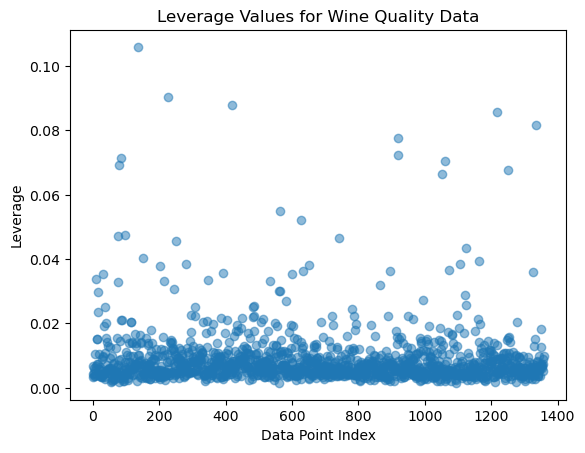

높은 레버리지를 가진 데이터의 인덱스:
[  11   15   17   30   35   38   41   75   77   80   85   86   87   96
  114  115  135  150  175  202  214  226  245  252  282  295  308  309
  331  345  346  357  363  385  393  404  420  432  433  437  445  448
  482  483  485  486  506  513  528  534  549  555  562  564  565  582
  597  599  602  626  632  652  687  719  722  741  781  786  791  792
  838  866  888  895  912  918  920  948  963  994 1013 1046 1052 1060
 1073 1098 1103 1106 1121 1123 1125 1159 1162 1165 1216 1250 1278 1325
 1336 1350]


In [65]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


# 독립변수와 종속변수 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 상수항 추가
X_with_const = sm.add_constant(X)

# OLS 모델 피팅
model = sm.OLS(y, X_with_const).fit()

# 레버리지 계산
leverage = model.get_influence().hat_matrix_diag

# 레버리지 시각화
plt.scatter(range(len(leverage)), leverage, alpha=0.5)
plt.title("Leverage Values for Wine Quality Data")
plt.xlabel("Data Point Index")
plt.ylabel("Leverage")
plt.show()

# 레버리지가 높은 데이터 인덱스 출력 (상위 n개)
threshold_leverage = 2 * (X.shape[1] + 1) / X.shape[0]  # 적절한 임계값 설정
high_leverage_points = (leverage > threshold_leverage).nonzero()[0]

print("높은 레버리지를 가진 데이터의 인덱스:")
print(high_leverage_points)


# 1.2 코드 해석
- OLS 모델을 만들고 레버리지 값을 계산하여 시각화함. 그 후 레버리지 값이 높은 데이터 포인트를 식별하고 해당 인덱스를 출력함.
- 임계값 threshold_leverage는 일반적으로 (2 * (p + 1)) / n로 설정되며, 여기서 p는 독립 변수의 수, n은 데이터 포인트의 수임. 이 임계값은 레버리지가 높다고 간주되는 기준을 제공함. 이 값을 조절하여 이상치로 간주할 데이터 포인트를 더 높거나 낮게 설정할 수 있음.
- OLS 모델 사용 이유: 간결하고 해석이 쉬움/모델이 설명력이 강함/모델 계수의 통계적 유의성 검정/레버리지와 이상치 분석/

# 1.3 결과 해석
- 요약: 위의 결과 값은 레버리지가 높은 데이터 포인트의 인덱스를 나타내고 있음. 레버리지가 높은 데이터 포인트는 해당 데이터가 모델에 큰 영향을 미칠 가능성이 있음. 이러한 데이터 포인트는 모델이 훈련 데이터를 설명할 때 높은 영햑력을 가질 수 있음. 그러나 이러한 것들이 반드시 이상치임을 나타내는 의미가 아님. 따라서 레버리지가 높은 데이터 포인트에 대한 추가적인 조사가 필요. 해당 데이터가 모델 또는 분석의 합리적인 결과를 만들어내는지 여부를 평가하는 것이 중요함.
- ----------------------------------------------------------------------------
- 레버리지가 높은 데이터 포인트의 인덱스를 나타내고 있음.
- 각 숫자는 데이터 프레임에서 해당되는 행의 인덱스를 나타냄. ex) 레버리지가 높은 데이터 포인트 중 첫 번째로 나타난 11은 데이터 프레임에서 11번째 행을 의미
- 레버리지는 해당 데이터 포인트가 모델에 미치는 영향을 측정하는 데 사용함. 레버리지가 높은 데이터 포인트는 해당 데이터가 모델에 큰 영향을 미칠 가능성이 있음을 나타냄. 이러한 데이터 포인트는 모델이 훈련 데이터를 설명할 때 높은 "영향력"을 가질 수 잇음.
- 레버리지가 높은 데이터 포인트를 식별하는 것은 모델을 해석하고 데이터에 대한 이해를 높이는 데 도움이 됨. 그러나 이것이 반드시 이상치라는 것을 의미하지는 않음. 이 데이터 포인트들이 모델의 설명력을 높이는 중요한 정보를 제공하는 것 뿐임.
- 레버리지가 높은 데이터 포인트에 대한 추가적인 조사가 필요. 해당 데이터가 모델 또는 분석의 합리적인 결과를 만들어내는지 여부를 평가하는 것이 중요함.

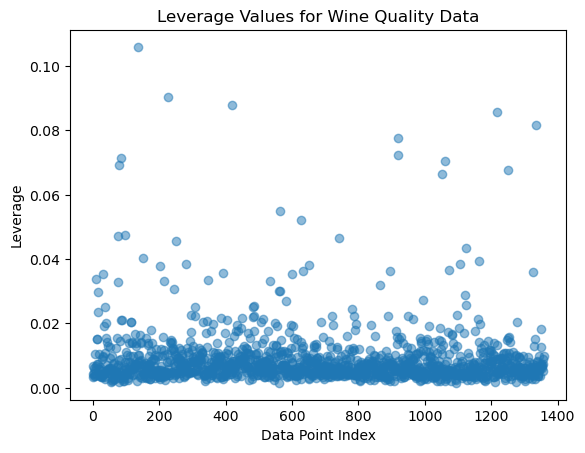

높은 레버리지를 가진 데이터:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              7.8             0.610         0.29            1.60      0.114   
17              8.1             0.560         0.28            1.70      0.368   
19              7.9             0.320         0.51            1.80      0.341   
33              6.9             0.605         0.12           10.70      0.073   
38              5.7             1.130         0.09            1.50      0.172   
42              7.5             0.490         0.20            2.60      0.332   
45              4.6             0.520         0.15            2.10      0.054   
81              7.8             0.430         0.70            1.90      0.464   
83              7.3             0.670         0.26            1.80      0.401   
86              8.6             0.490         0.28            1.90      0.110   
92              8.6             0.490         0.29            2.00      0.110   
94         

In [66]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 독립변수와 종속변수 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 상수항 추가
X_with_const = sm.add_constant(X)

# OLS 모델 피팅
model = sm.OLS(y, X_with_const).fit()

# 레버리지 계산
leverage = model.get_influence().hat_matrix_diag

# 레버리지 시각화
plt.scatter(range(len(leverage)), leverage, alpha=0.5)
plt.title("Leverage Values for Wine Quality Data")
plt.xlabel("Data Point Index")
plt.ylabel("Leverage")
plt.show()

# 레버리지가 높은 데이터 출력 (상위 n개)
threshold_leverage = 2 * (X.shape[1] + 1) / X.shape[0]  # 적절한 임계값 설정
high_leverage_points = (leverage > threshold_leverage).nonzero()[0]

# 각 변수에 대해 이상치를 나타내는 불리언 시리즈 생성
outliers_per_variable = df.apply(detect_outliers_iqr)

# 각 행에 대해 어떤 변수에서 이상치가 있는지를 나타내는 불리언 시리즈 생성
outliers_per_row = outliers_per_variable.any(axis=1)

# 높은 레버리지를 가진 데이터의 행 표시
high_leverage_rows = df.iloc[high_leverage_points]
print("높은 레버리지를 가진 데이터:")
print(high_leverage_rows)


# 1.4 높은 레버리지 다루기???

- 1. 데이터 이상치 식별 및 처리: 레버리지가 높은 데이터포인트가 이상치인지 확인하고, 필요하다면 해당 이상치를 식별하고 처리합니다. 예를 들어, 이상치를 제거하거나 수정하여 모델에 미치는 영향을 줄일 수 있습니다.
- 2. 변수 변환: 데이터의 특성을 고려하여 변수를 변환하거나 스케일링하는 등의 전처리를 수행할 수 있습니다. 이는 레버리지의 영향을 줄이는 데 도움이 될 수 있습니다.
- 3. 다항식 특성 추가: 다항식 특성을 추가하여 모델에 더 적합하게 만들 수 있습니다. 이는 특히 비선형 관계가 존재할 때 유용할 수 있습니다.
- 4. 모델 변경: 다른 모델을 시도해보거나 복잡성을 조절할 수 있는 모델 파라미터를 조정할 수 있습니다.
- 5. 정규화: 모델에 정규화를 적용하여 가중치를 제한하거나 특성 선택을 통해 영향력 있는 특성만 사용하는 등의 방법을 고려할 수 있습니다.
- Cross-validation 활용: 모델의 성능을 평가할 때 cross-validation을 사용하여 일반화 성능을 더 정확히 평가할 수 있습니다.
-----------------------------------------------------------------------------
- 중요:  레버리지가 높은 데이터포인트를 다룰 때는 신중해야 합니다. 모델에서 이러한 데이터포인트가 중요한 역할을 하는 경우가 있기 때문에, 해당 데이터포인트를 제거하기 전에 모델의 성능에 미치는 영향을 신중하게 고려해야 합니다.

In [67]:
# 출력 옵션 설정 (모든 행과 열을 표시하도록 설정)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 독립변수와 종속변수 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 상수항 추가
X_with_const = sm.add_constant(X)

# OLS 모델 피팅
model = sm.OLS(y, X_with_const).fit()

# 레버리지 계산
leverage = model.get_influence().hat_matrix_diag

# 레버리지가 높은 데이터포인트의 인덱스 찾기
threshold_leverage = 2 * (X.shape[1] + 1) / X.shape[0]  # 적절한 임계값 설정
high_leverage_points = (leverage > threshold_leverage)
high_leverage_indices = high_leverage_points.nonzero()[0]

# 레버리지가 높은 데이터포인트의 인덱스와 레버리지 값 출력
high_leverage_data = pd.DataFrame({'Index': high_leverage_indices, 'Leverage': leverage[high_leverage_points]})

# 이상치를 나타내는 함수
def detect_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# 각 변수에 대해 이상치를 나타내는 불리언 시리즈 생성
outliers_per_variable = df.apply(detect_outliers_iqr)

# 각 행에 대해 어떤 변수에서 이상치가 있는지를 나타내는 불리언 시리즈 생성
outliers_per_row = outliers_per_variable.any(axis=1)


# IQR을 이용한 이상치 탐지
outliers_iqr = X.apply(detect_outliers_iqr)

# IQR을 이용한 이상치 중 레버리지가 높은 데이터포인트
common_outliers = outliers_iqr[outliers_iqr.any(axis=1) & X.index.isin(high_leverage_indices)]

# IQR 이상치 중 레버리지가 높은 데이터포인트의 인덱스
common_outliers_indices = common_outliers.index
print("\n레버리지가 높은 데이터포인트와 IQR 이상치의 교집합 인덱스:")
# 인덱스를 리스트로 변환하고 출력
print(common_outliers_indices.tolist())



레버리지가 높은 데이터포인트와 IQR 이상치의 교집합 인덱스:
[15, 17, 35, 38, 86, 226, 308, 363, 482, 483, 506, 549, 599, 652, 719, 741, 791, 1098, 1165]


In [68]:
## 독립변수와 종속변수 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 상수항 추가
X_with_const = sm.add_constant(X)

# OLS 모델 피팅
model = sm.OLS(y, X_with_const).fit()

# 레버리지 계산
leverage = model.get_influence().hat_matrix_diag

# 레버리지가 높은 데이터포인트의 인덱스 찾기
threshold_leverage = 2 * (X.shape[1] + 1) / X.shape[0]  # 적절한 임계값 설정
high_leverage_points = (leverage > threshold_leverage)
high_leverage_indices = high_leverage_points.nonzero()[0]

# 레버리지가 높은 데이터포인트의 인덱스와 레버리지 값 출력
high_leverage_data = pd.DataFrame({'Index': high_leverage_indices, 'Leverage': leverage[high_leverage_points]})

# 이상치를 나타내는 함수
def detect_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# 각 변수에 대해 이상치를 나타내는 불리언 시리즈 생성
outliers_per_variable = df.apply(detect_outliers_iqr)

# 각 행에 대해 어떤 변수에서 이상치가 있는지를 나타내는 불리언 시리즈 생성
outliers_per_row = outliers_per_variable.any(axis=1)


# IQR을 이용한 이상치 탐지
outliers_iqr = X.apply(detect_outliers_iqr)

# IQR을 이용한 이상치 중 레버리지가 높은 데이터포인트
common_outliers = outliers_iqr[outliers_iqr.any(axis=1) & X.index.isin(high_leverage_indices)]


# IQR 이상치 중 레버리지가 높은 데이터포인트의 행 출력
common_outliers_rows = df.iloc[common_outliers.index]
print("\n레버리지가 높은 데이터포인트와 IQR 이상치의 교집합:")
print(common_outliers_rows)



레버리지가 높은 데이터포인트와 IQR 이상치의 교집합:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
17              8.1             0.560         0.28             1.7      0.368   
19              7.9             0.320         0.51             1.8      0.341   
38              5.7             1.130         0.09             1.5      0.172   
42              7.5             0.490         0.20             2.6      0.332   
94              5.0             1.020         0.04             1.4      0.045   
258             7.7             0.410         0.76             1.8      0.611   
353            13.5             0.530         0.79             4.8      0.120   
415             8.6             0.725         0.24             6.6      0.117   
553             5.0             1.040         0.24             1.6      0.050   
554            15.5             0.645         0.49             4.2      0.095   
584            11.8             0.330         0.49             3.4      0.093

# 2. 예측 확률 분포 분석

# 3. SHAP(SHapley Additive exPlanations) 값 분석

# 3.1 개념
- SHAP (SHapley Additive exPlanations) 값은 모델 예측의 해석과 이해를 돕기 위한 방법으로, 모델이 개별 예측에 대해 어떻게 결정되었는지 설명하는 데 사용됩니다. SHAP 값은 Shapley 값의 개념을 기반으로 하며, 각 특성이 예측에 얼마나 기여했는지를 나타냅니다.
- 이상치와 SHAP 값은 관련이 있을 수 있습니다. SHAP 값은 모델의 예측을 설명하는 데 도움을 주는 도구이지만, 모델에 이상치가 포함되어 있으면 SHAP 값이 왜곡될 수 있습니다. 특히 이상치가 모델의 학습에 큰 영향을 미치는 경우 해당 이상치의 SHAP 값이 다른 데이터 포인트에 비해 높게 나타날 수 있습니다.
- 일반적으로 SHAP 값은 모델의 예측에 대한 특성의 상대적인 중요성을 제공합니다. 이를 통해 각 특성이 모델의 예측에 미치는 영향을 이해할 수 있습니다. 이상치 처리를 고려할 때는 이러한 SHAP 값의 해석이 왜곡되지 않도록 주의해야 합니다.
- --------------------------------------------------------------------------
- 고려 사항
- 1. 이상치 영향 확인: SHAP 값을 사용하여 특정 예측에 대한 각 특성의 기여를 확인하고, 이상치가 해당 기여에 미치는 영향을 조사합니다.
- 2. 이상치 제거 후 SHAP 값 비교: 이상치를 제거한 후 모델의 SHAP 값을 비교하여 이상치가 SHAP 값에 미치는 영향을 확인할 수 있습니다.
- 3. SHAP 값 시각화: SHAP 값의 시각화를 통해 특성 간의 상대적인 중요성 및 이상치의 영향을 더 잘 이해할 수 있습니다.
--------------------------------------------------------------

# 4. 특성 중요도 분석
- 결과적으로 2부터 4는 이상치를 처리하거나 대처하는 데에는 관련이 없는것 같은데?

# 히스토그램(일반, 복잡), 히트맵, violet plot
# df 